In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("output_data.csv")

In [4]:
df.head()

,SamplingMethod,DatasetType,NrOfPoints,Seed,SampleSize,TotalTime,RoundTimes,CoresetSize,AvgQuality,NormQuality
0,Grid,Noisy circle,10000,105,0.0,61.16,"[13.12, 10.74, 7.73, 7.36]",7,1.523497,1.668048
1,Ball,Noisy circle,10000,105,10.0,43.99,"[8.9, 8.2, 17.13, 9.49]",11,1.794559,1.089988
2,Ball,Noisy circle,10000,105,100.0,37.93,"[8.08, 7.92, 7.86, 13.79]",108,1.612787,1.072935
3,Ball,Noisy circle,10000,105,1000.0,50.93,"[15.76, 12.75, 10.13, 11.83]",6084,1.640791,1.339760
4,Grid,Noisy moon,10000,105,0.0,45.89,"[12.82, 11.3, 11.17, 10.16]",5,1.884700,1.950854


### Coreset size

In [6]:
def plot_coreset(df):
    # coreset size per dataset for ball vs. grid
    dataset_types = df["DatasetType"].unique().tolist()
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
    axes = axes.ravel()

    for i in range(len(dataset_types)):
        plot = pd.pivot_table(df[df["DatasetType"]==dataset_types[i]], values = 'CoresetSize', index = 'NrOfPoints', columns = 'Method',
                       aggfunc = lambda x: np.mean(x)).plot.bar(ax=axes[i])

        plot.set_ylabel("CoresetSize", size = 12)
        plot.set_xlabel("NrOfPoints", size = 12);
        plot.set_title(dataset_types[i])
    fig.tight_layout()

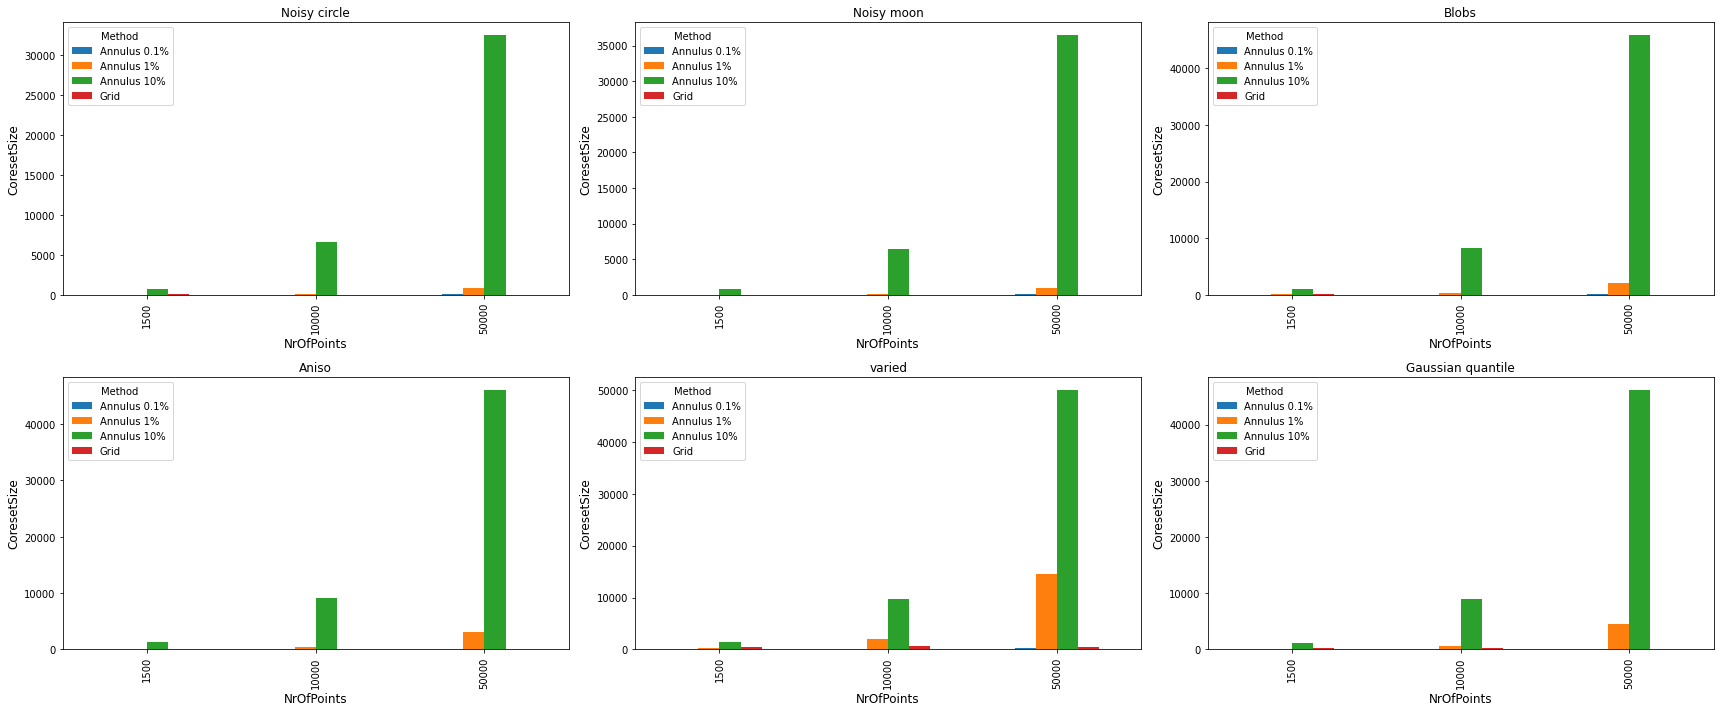

In [7]:
df['SampleRatio'] = df["SampleSize"]/df["NrOfPoints"]*100
conditions = [(df['SamplingMethod']=='Grid'),(df['SamplingMethod']=='Ball')&(df["SampleRatio"]==0.1),
                                             (df['SamplingMethod']=='Ball')&(df["SampleRatio"]==1),
                                             (df['SamplingMethod']=='Ball')&(df["SampleRatio"]==10)]
choices = ['Grid','Annulus 0.1%', 'Annulus 1%', 'Annulus 10%']
df['Method'] = np.select(conditions, choices, default='NA')

plot_coreset(df)

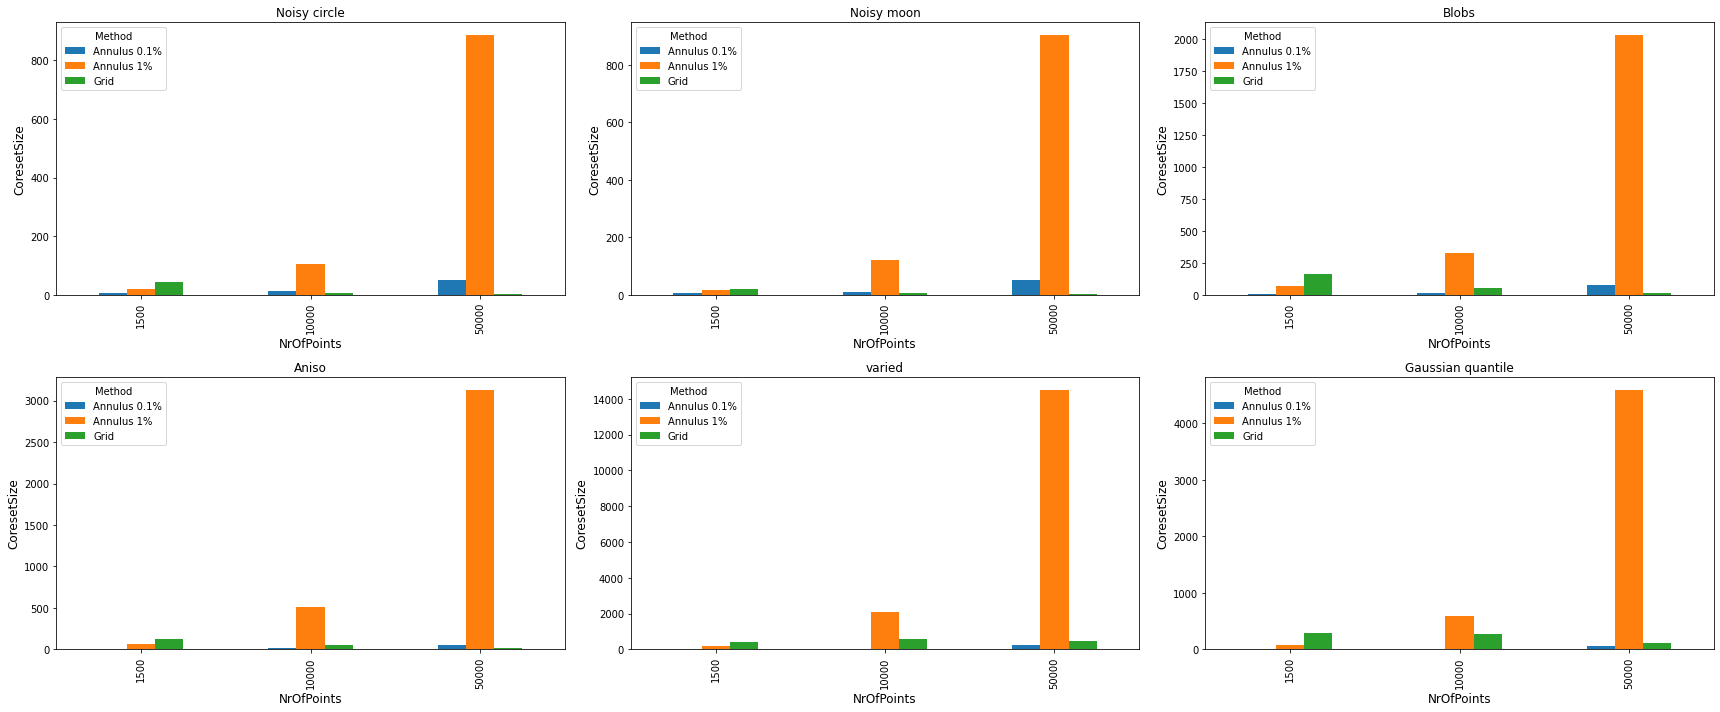

In [9]:
df_ball = df[df["Method"]!="Annulus 10%"]
plot_coreset(df_ball)

### Quality of clustering

In [5]:
print(df[df['DatasetType'] == "Noisy circle"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy circle"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              1.517384     1.130273
Grid              2.070626     1.100412


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
50000      Ball           50.0          1.602867     1.239675
                          500.0         1.547976     1.063299
                          5000.0        1.401309     1.087844
           Grid           0.0           2.070626     1.100412

In [6]:
print(df[df['DatasetType'] == "Noisy moon"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy moon"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              2.005226     1.493592
Grid              2.221772     1.384315


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
50000      Ball           50.0          2.115465     1.373525
                          500.0         1.902049     1.578955
                          5000.0        1.998165     1.528296
           Grid           0.0           2.221772     1.384315

In [7]:
print(df[df['DatasetType'] == "Blobs"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Blobs"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             33.401270    16.475356
Grid             35.564313    14.638866


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
50000      Ball           50.0         34.470397    15.801930
                          500.0        33.260462    18.985232
                          5000.0       32.472950    14.638906
           Grid           0.0          35.564313    14.638866

In [8]:
print(df[df['DatasetType'] == "Aniso"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Aniso"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             10.375720     7.605787
Grid              8.801686     4.556313


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          12.478863     9.138021
                          15.0         10.616755     7.401266
                          150.0         9.470189     7.404109
           Grid           0.0           8.108294     2.890863
10000      Ball           10.0         10.888532     6.816561
                          100.0        10.053455     7.991822
                          1000.0        9.047152     6.594716
           Grid           0.0           8.498743     5.746002
50000      Ball           50.0         11.384508     8.610230
                          500.0        10.055612     7.811736
                          5000.0        9.386412     6.683620
           Grid           0.0           9.798021     5.032075

In [9]:
print(df[df['DatasetType'] == "varied"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "varied"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             18.699412    10.876688
Grid             17.149616    10.049773


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
50000      Ball           50.0         20.688562    11.655400
                          500.0        17.980803    11.510901
                          5000.0       17.428871     9.463764
           Grid           0.0          17.149616    10.049773

In [10]:
print(df[df['DatasetType'] == "Gaussian quantile"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Gaussian quantile"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              5.748702     3.473913
Grid              4.362932     2.303922


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
50000      Ball           50.0          6.791081     4.510125
                          500.0         5.507245     3.432295
                          5000.0        4.947781     2.479318
           Grid           0.0           4.362932     2.303922

## Timing

In [11]:
df.groupby(["SamplingMethod", "NrOfPoints", "SampleSize"]).mean()

Seed  TotalTime   CoresetSize  \
SamplingMethod NrOfPoints SampleSize                                   
Ball           1500       1.5         102.8  32.498000      4.000000   
                          15.0        102.8  31.732000     68.000000   
                          150.0       102.8  32.052000   1352.000000   
               10000      10.0        102.8  31.522000     11.200000   
                          100.0       102.8  31.650000    493.000000   
                          1000.0      102.8  32.364000   9051.800000   
               50000      50.0        102.8  32.974333     89.600000   
                          500.0       102.8  33.624000   4339.800000   
                          5000.0      102.8  33.365667  42820.466667   
Grid           1500       0.0         102.8  36.926000    129.000000   
               10000      0.0         102.8  33.088000     52.200000   
               50000      0.0         102.8  33.222333     97.866667   

                                      AvgQuality  NormQuality  
SamplingMethod NrOfPoints SampleSize                           
Ball           1500       1.5          12.478863     9.138021  
                          15.0         10.616755     7.401266  
                          150.0         9.470189     7.404109  
               10000      10.0         10.888532     6.816561  
                          100.0        10.053455     7.991822  
                          1000.0        9.047152     6.594716  
               50000      50.0         12.842147     7.198481  
                          500.0        11.709024     7.397070  
                          5000.0       11.272581     5.980291  
Grid           1500       0.0           8.108294     2.890863  
               10000      0.0           8.498743     5.746002  
               50000      0.0          11.861213     5.751561

In [12]:
runtime = df[["SamplingMethod", "NrOfPoints", "SampleSize", "TotalTime"]].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"]).mean()
runtime

TotalTime
NrOfPoints SamplingMethod SampleSize           
1500       Ball           1.5         32.498000
                          15.0        31.732000
                          150.0       32.052000
           Grid           0.0         36.926000
10000      Ball           10.0        31.522000
                          100.0       31.650000
                          1000.0      32.364000
           Grid           0.0         33.088000
50000      Ball           50.0        32.974333
                          500.0       33.624000
                          5000.0      33.365667
           Grid           0.0         33.222333

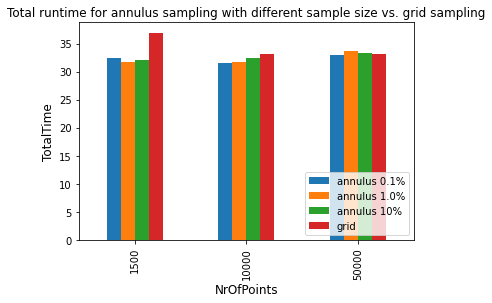

In [15]:
ball_01 = [32.498000, 31.522000, 32.974333]
ball_1 = [31.732000, 31.650000, 33.624000]
ball_10 = [32.052000, 32.364000, 33.365667]
grid = [36.926000, 33.088000, 33.222333]
index = ['1500', '10000', '50000']
df = pd.DataFrame({'annulus 0.1%': ball_01,
                   'annulus 1.0%': ball_1,
                   'annulus 10%': ball_10,
                   'grid': grid}, index=index)
ax = df.plot.bar()
ax.set_ylabel("TotalTime", size = 12)
ax.set_xlabel("NrOfPoints", size = 12);
ax.set_title("Total runtime for annulus sampling with different sample size vs. grid sampling")
ax.legend(loc='lower right')